In [1]:
import os
import logging
import cv2
import numpy as np
from imageio import imread
import matplotlib
from matplotlib import pyplot as plt
from skimage.segmentation import mark_boundaries, find_boundaries
from contour import count_population
from skimage.color import rgb2hsv
import morphsnakes as ms
from threading import Thread
from clustering import * 

%matplotlib inline

In [2]:
def rgb2gray(img):
    """Convert a RGB image to gray scale."""
    return 0.2989 * img[..., 0] + 0.587 * img[..., 1] + 0.114 * img[..., 2]

In [3]:
PATH_IMG_LA = '../exampleImages/SD.png'
PAUSE_TIME = 0.000001

num_districts = 8

# Load the image.
imgcolor = imread(PATH_IMG_LA)
# imgcolor = imgcolor / 255
img = rgb2gray(imgcolor)

population_count = count_population(PATH_IMG_LA)
print(population_count)

11883900


In [4]:
def find_population_in_level_set(levelset):
    population = 0

    for i in range(len(levelset)):
        for j in range(len(levelset[i])):
            pix = (img[i][j])
            if (levelset[i][j] == 1) and pix < 0.9:
                # print(i, j, pix)
                population += 1

    # for level in levelset:
    #     for pixel in level:
    #         if pixel == 1:
    #             population += 1

    return population*200

In [5]:
def score(levelset, district_count, population):
    district_population = find_population_in_level_set(levelset)
    ideal_count = population / district_count

    ratio1 = district_population/ideal_count
    return ratio1

In [6]:
def visual_callback_2d(background, fig=None):
    """
    Returns a callback than can be passed as the argument `iter_callback`
    of `morphological_geodesic_active_contour` and
    `morphological_chan_vese` for visualizing the evolution
    of the levelsets. Only works for 2D images.
    Parameters
    ----------
    background : (M, N) array
        Image to be plotted as the background of the visual evolution.
    fig : matplotlib.figure.Figure
        Figure where results will be drawn. If not given, a new figure
        will be created.
    Returns
    -------
    callback : Python function
        A function that receives a levelset and updates the current plot
        accordingly. This can be passed as the `iter_callback` argument of
        `morphological_geodesic_active_contour` and
        `morphological_chan_vese`.
    """

    # Prepare the visual environment.
    if fig is None:
        fig = plt.figure()
    fig.clf()
    ax1 = fig.add_subplot(111)
    ax1.imshow(background, cmap=plt.cm.gray)

    #ax2 = fig.add_subplot(1, 2, 2)
    #ax_u = ax2.imshow(np.zeros_like(background), vmin=0, vmax=1)

    plt.pause(PAUSE_TIME)

    def callback(levelset, counter, prevscore=0):
        # print(levelset.shape)
        if counter % 15 == 0:
            cur_score = score(levelset, num_districts, population_count)
            print('Districts: ', num_districts, ', Score:', cur_score)

            if (cur_score > 0.97):
                print('Done with contour, score=', cur_score)
                return cur_score

        if ax1.collections:
            del ax1.collections[0]

        ax1.contour(levelset, [0.5], colors='r')
        #ax_u.set_data(levelset)
        fig.canvas.draw()
        
        plt.pause(PAUSE_TIME)
        return prevscore

    return callback

Num clusters= 8
Cluster centers: [[690.12506831 263.89856557]
 [293.06873158 245.9485332 ]
 [574.85246248 351.68773339]
 [159.20539517 175.1308566 ]
 [427.82378223 243.10189112]
 [397.52889699 476.13108478]
 [569.77224868 202.47535377]
 [660.02616487 558.43978495]]


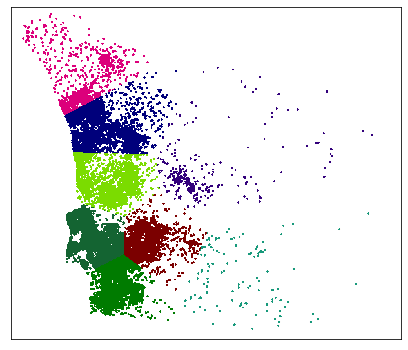

In [7]:
logging.info('Running: example_lakes (MorphACWE)...')
global img
global num_districts
points = find_centers(PATH_IMG_LA, viz=True)
num_districts = len(points)

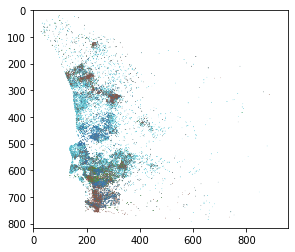

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


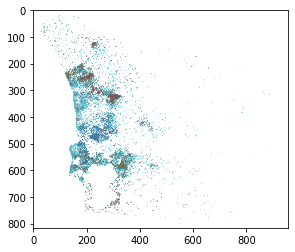

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


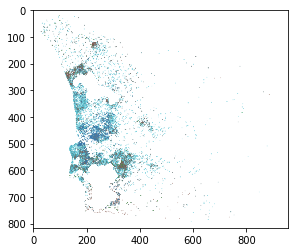

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


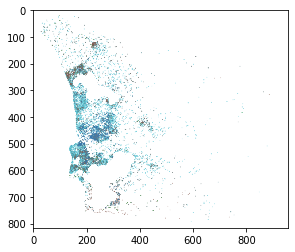

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


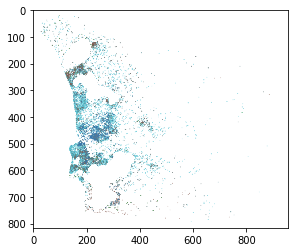

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


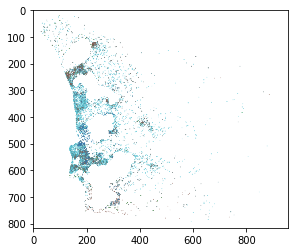

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


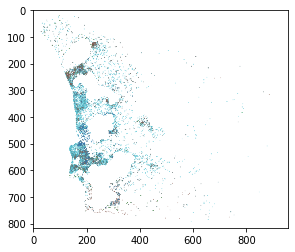

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


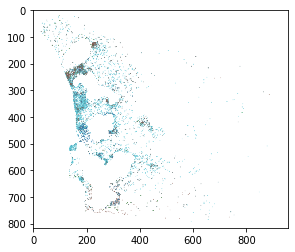

Calling local morphological_chan_vese
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0
Districts:  8 , Score: 0.0


In [8]:
all_scores = []
all_districts = []
    # Initialization of the level-set.
for point in points:
    init_ls = ms.circle_level_set(img.shape, point, 40)

        # Callback for visual plotting
    callback = visual_callback_2d(imgcolor)

        # Morphological Chan-Vese (or ACWE)
    r, score_s = ms.morphological_chan_vese(img, iterations=100,
                                              init_level_set=init_ls,
                                              smoothing=3, lambda1=1, lambda2=1,
                                              iter_callback=callback)

    all_scores.append(score_s)
    all_districts.append(r)
    imgcolor[r!=0] = (255, 255, 255, 1)

In [ ]:
pts = np.array([[0, 0]])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (img[i][j] < 250):
            pts = np.append(pts, [[i, j]], axis=0)

In [ ]:
def getColor(cluster):
    if cluster == 0:
        return (0, 123, 0, 1)
    if cluster == 1:
        return (0, 0, 123, 1)
    if cluster == 2:
        return (123, 0, 0, 1)
    if cluster == 3:
        return (220, 0, 123, 1)
    if cluster == 4:
        return (123, 220, 0, 1)
    if cluster == 5:
        return (50, 0, 123, 1)
    if cluster == 6:
        return (20, 100, 50, 1)
    else:
        return (23, 153, 123, 1)

imcolor2 = imread(PATH_IMG_LA)
visited = [False] * len(pts)

for k, district in enumerate(all_districts):
    # for i in range(img.shape[0]):
        # for j in range(img.shape[1]):
            # if (district[i][j] != 0):
                # if img[i][j] < 250:
                    # imcolor2[i][j] = getColor(k)
    for p, (i, j) in enumerate(pts):
        if district[i][j] != 0:
            if visited[p] == False:
                imcolor2[i][j] = getColor(k)
                visited[p] = True

for idx, pt in enumerate(pts):
    if visited[idx] == False:
        a = np.linalg.norm(points - pt, axis=1)
        color = np.argmin(a)
        i = pt[0]
        j = pt[1]
        imcolor2[i][j] = getColor(color)

In [ ]:
cv2.imwrite('result_NY.jpg', imcolor2)

cv2.imshow('img', imcolor2)
cv2.cv2.waitKey(0)
cv2.destroyAllWindows()